In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from seaborn import heatmap

| Código  | Litologia                |
|---------|--------------------------|
| 30000   | Sandstone (Arenito)      |
| 65030   | Sandstone/Shale (Arenito/Argilito) |
| 65000   | Shale (Argilito)         |
| 80000   | Marl (Marga)             |
| 74000   | Dolomite (Dolomita)      |
| 70000   | Limestone (Calcário)     |
| 70032   | Chalk (Giz)              |
| 88000   | Halite (Halita)          |
| 86000   | Anhydrite (Anidrita)     |
| 99000   | Tuff (Tufo)              |
| 90000   | Coal (Carvão)            |
| 93000   | Basement (Substrato)     |


In [3]:
#Carregando arquivo csv
df = pd.read_csv('Data/train.csv',sep=';')
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [5]:
#Verificando o nome das colunas
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [6]:
#Verificando número de poços
print(f"Número de poços disponíveis: {len(df.WELL.unique())}")

Número de poços disponíveis: 98


In [7]:
for i in df.WELL.unique():
    print(i)

15/9-13
15/9-15
15/9-17
16/1-2
16/1-6 A
16/10-1
16/10-2
16/10-3
16/10-5
16/11-1 ST3
16/2-11 A
16/2-16
16/2-6
16/4-1
16/5-3
16/7-4
16/7-5
16/8-1
17/11-1
25/11-15
25/11-19 S
25/11-5
25/2-13 T4
25/2-14
25/2-7
25/3-1
25/4-5
25/5-1
25/5-4
25/6-1
25/6-2
25/6-3
25/7-2
25/8-5 S
25/8-7
25/9-1
26/4-1
29/6-1
30/3-3
30/3-5 S
30/6-5
31/2-1
31/2-19 S
31/2-7
31/2-8
31/2-9
31/3-1
31/3-2
31/3-3
31/3-4
31/4-10
31/4-5
31/5-4 S
31/6-5
31/6-8
32/2-1
33/5-2
33/6-3 S
33/9-1
33/9-17
34/10-19
34/10-21
34/10-33
34/10-35
34/11-1
34/11-2 S
34/12-1
34/2-4
34/3-1 A
34/4-10 R
34/5-1 A
34/5-1 S
34/7-13
34/7-20
34/7-21
34/8-1
34/8-3
34/8-7 R
35/11-1
35/11-10
35/11-11
35/11-12
35/11-13
35/11-15 S
35/11-6
35/11-7
35/12-1
35/3-7 S
35/4-1
35/8-4
35/8-6 S
35/9-10 S
35/9-2
35/9-5
35/9-6 S
36/7-3
7/1-1
7/1-2 S


In [8]:
well_not_null = [i for i in df.WELL.unique() if True in df[df.WELL == i].isnull().any().values]
print(f'Número de poços com valores nulos: {len(well_not_null)}')

Número de poços com valores nulos: 98


##### Todos os poços tem valores nulos.

In [9]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [10]:
#### Como essa será uma aplicação simples, irei separar os dados com o maior número de informações
cols =['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION','CALI', 'RMED', 'RDEP', 'RHOB',
        'GR','NPHI','DTC','FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE']

df = df[~df.NPHI.isnull()][cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765409 entries, 4238 to 1170488
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               765409 non-null  object 
 1   DEPTH_MD                           765409 non-null  float64
 2   X_LOC                              761901 non-null  float64
 3   Y_LOC                              761901 non-null  float64
 4   Z_LOC                              761901 non-null  float64
 5   GROUP                              765409 non-null  object 
 6   FORMATION                          726897 non-null  object 
 7   CALI                               732451 non-null  float64
 8   RMED                               748289 non-null  float64
 9   RDEP                               761704 non-null  float64
 10  RHOB                               750893 non-null  float64
 11  GR                                 76540

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642770 entries, 4238 to 1170446
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               642770 non-null  object 
 1   DEPTH_MD                           642770 non-null  float64
 2   X_LOC                              642770 non-null  float64
 3   Y_LOC                              642770 non-null  float64
 4   Z_LOC                              642770 non-null  float64
 5   GROUP                              642770 non-null  object 
 6   FORMATION                          642770 non-null  object 
 7   CALI                               642770 non-null  float64
 8   RMED                               642770 non-null  float64
 9   RDEP                               642770 non-null  float64
 10  RHOB                               642770 non-null  float64
 11  GR                                 64277

In [12]:
print(f'Número de Poços: {len(df.WELL.unique())}')

Número de Poços: 96


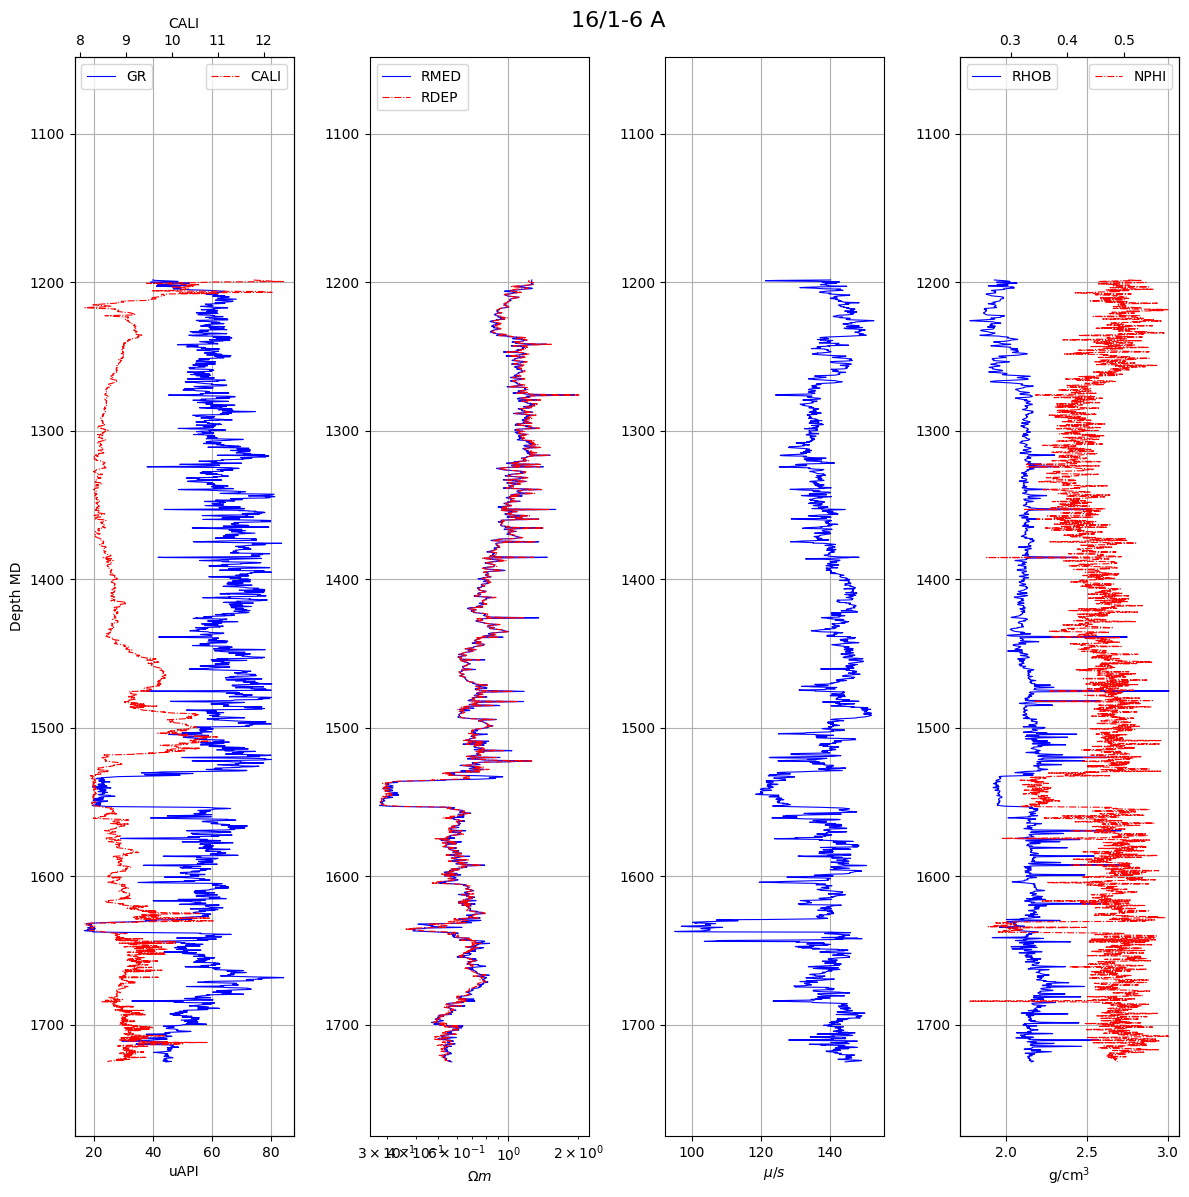

In [15]:
plot_logs(df[df.WELL==df.WELL.unique()[4]])

In [16]:
#Montando uma lista com as localizações da primeira medida de X e Y
loc = [(float(df[df.WELL==i].X_LOC[0:1]),float(df[df.WELL==i].Y_LOC[0:1])) for i in df.WELL.unique()]

X,Y = list(zip(*loc))

C:\Users\Acer3\AppData\Local\Temp\ipykernel_45340\3408780481.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  loc = [(float(df[df.WELL==i].X_LOC[0:1]),float(df[df.WELL==i].Y_LOC[0:1])) for i in df.WELL.unique()]


C:\Users\Acer3\AppData\Local\Temp\ipykernel_45340\2829372567.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


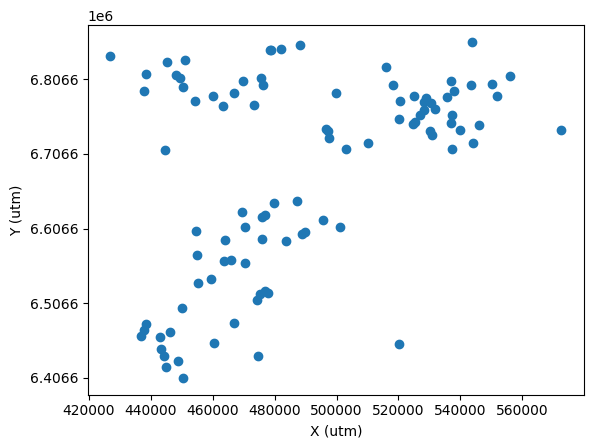

In [17]:
fig,axes = plt.subplots()

axes.scatter(X,Y)
axes.set_yticks(np.arange(np.min(Y), np.max(Y),100000))

axes.set_xlabel('X (utm)')
axes.set_ylabel('Y (utm)')

fig.show()

#### Tratamento dos dados

In [18]:
#Veja que as variáveis GROUP e FORMATION constam como object (str)
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,642770.000000,642770.000000,6.427700e+05,642770.000000,642770.000000,642770.000000,642770.000000,642770.000000,642770.000000,642770.000000,642770.000000,642770.000000,642770.000000
mean,2577.093457,485042.625889,6.680080e+06,-2519.450061,11.446650,5.028384,6.153584,2.351890,75.389571,0.328922,102.883177,60562.200457,1.119094
std,912.528482,35444.705297,1.329503e+05,887.438101,2.966818,27.066530,52.507659,0.222092,33.788046,0.127753,25.899829,14331.936642,0.364741
min,761.041604,426899.312500,6.406641e+06,-5395.414551,2.344000,0.095034,0.070418,0.720971,0.898921,-0.035822,7.415132,30000.000000,1.000000
25%,1877.290000,454132.906250,6.564101e+06,-3087.091919,8.725589,1.070688,1.042699,2.200615,53.127788,0.241808,82.974648,65000.000000,1.000000
50%,2458.855200,476768.250000,6.738648e+06,-2424.648071,12.009177,1.858777,1.726155,2.391619,74.590904,0.323423,96.371391,65000.000000,1.000000
75%,3170.540604,520081.109375,6.788163e+06,-1839.905701,12.815704,4.122478,3.672771,2.524841,93.294069,0.411425,120.999504,65030.000000,1.000000
max,5436.480000,572632.750000,6.856661e+06,-735.958557,25.717396,1988.616333,1999.877808,3.262041,1076.963867,0.999570,320.478882,99000.000000,3.000000


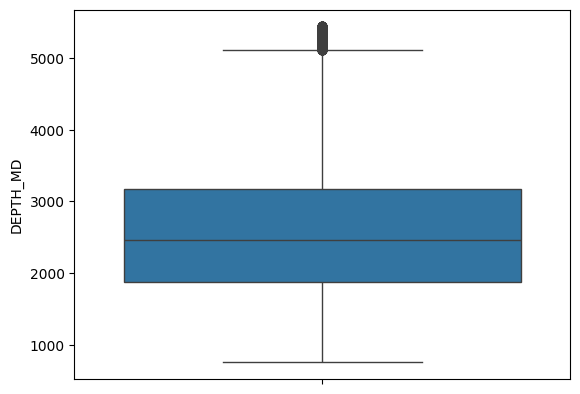

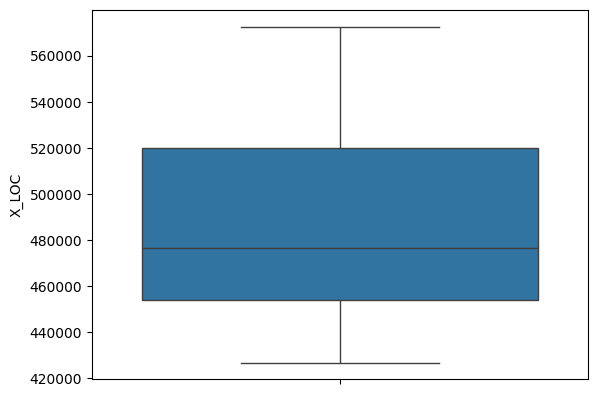

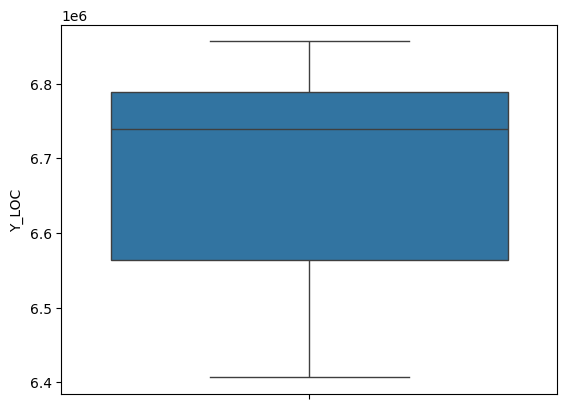

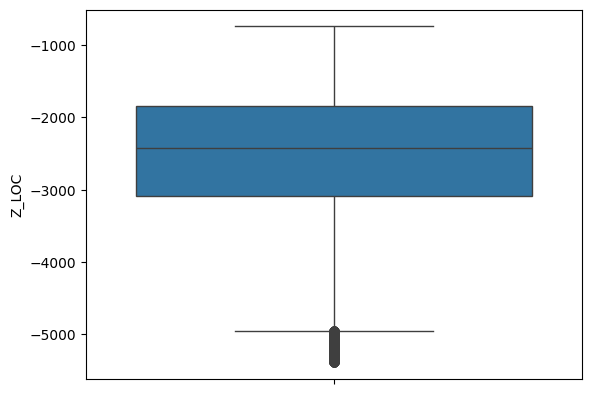

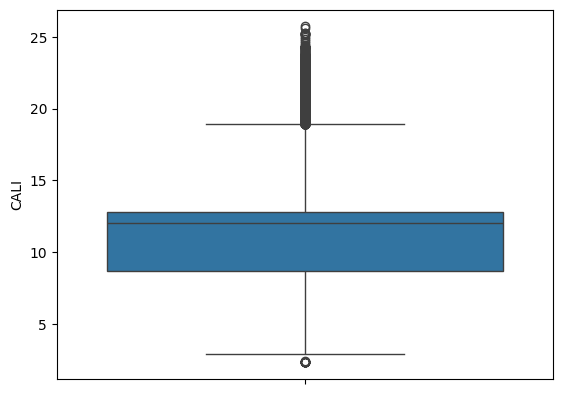

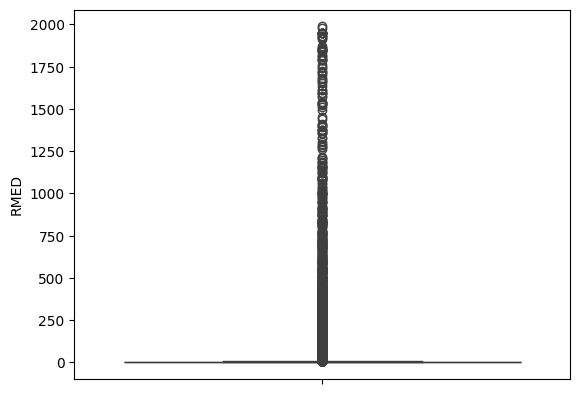

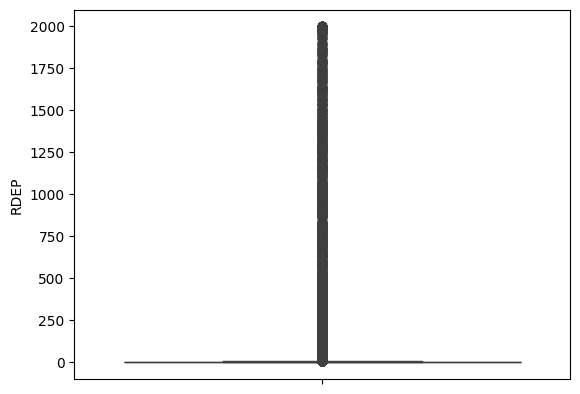

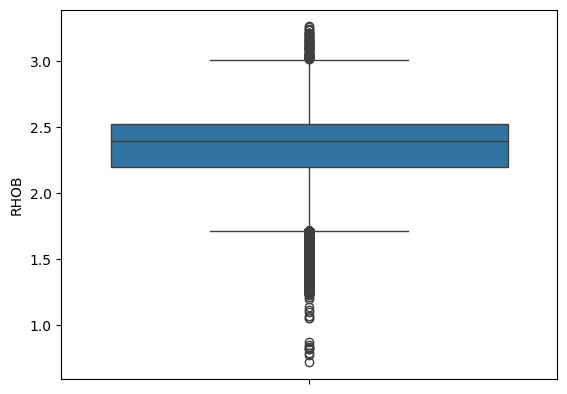

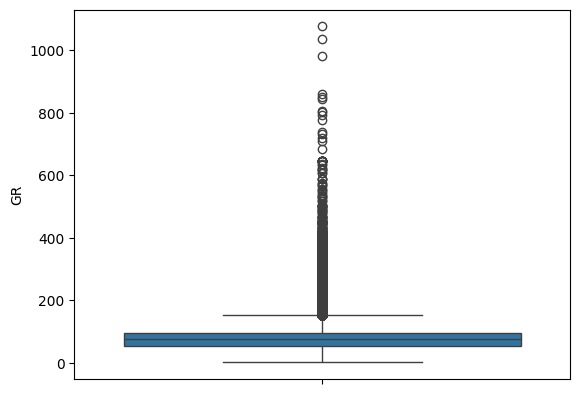

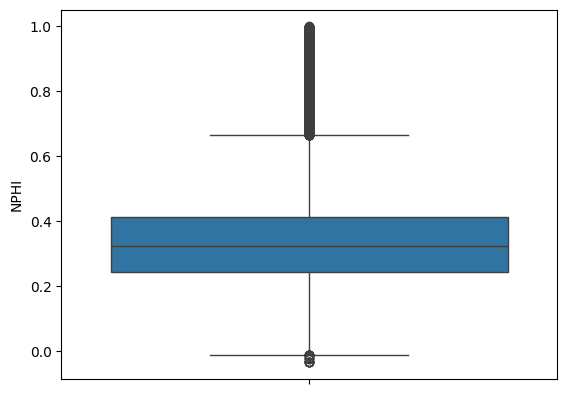

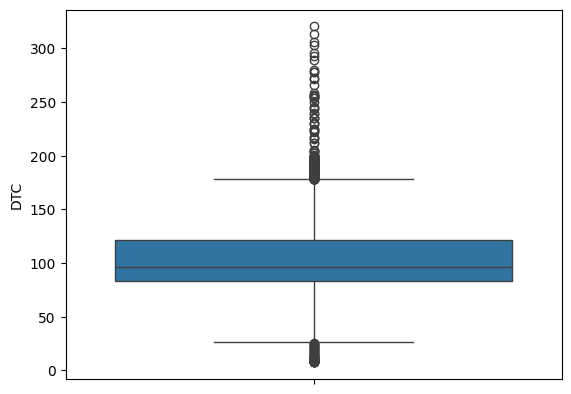

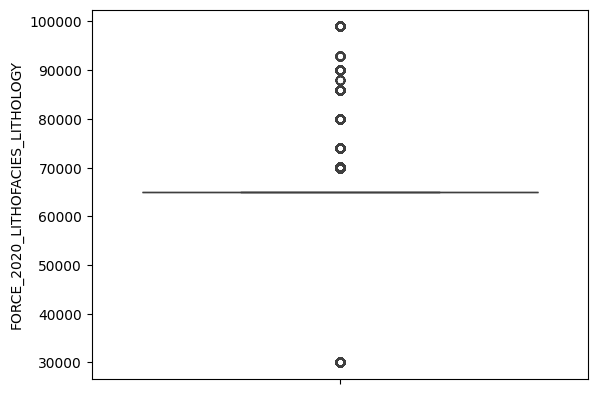

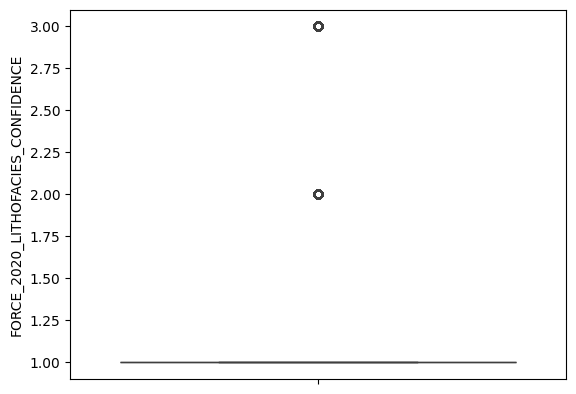

In [19]:
for i in df.describe().columns:
    plt.figure()
    sns.boxplot(df[i])

In [20]:
#Obter a curvar do log das resistividades
df['log_rmed'] = np.log10(df.RMED)
df['log_rdep'] = np.log10(df.RDEP)

<Axes: ylabel='log_rdep'>

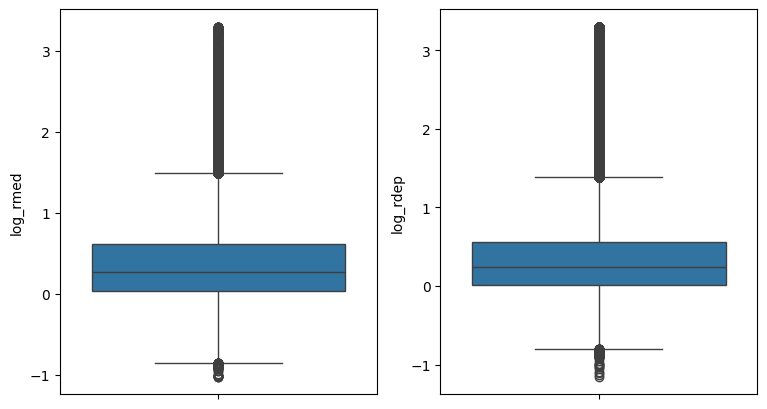

In [21]:
fig, axes = plt.subplots(1,2,figsize=(9,5))

sns.boxplot(df['log_rmed'],ax=axes[0])
sns.boxplot(df['log_rdep'],ax=axes[1])

(array([1.20000e+01, 1.83000e+02, 8.22000e+02, 2.91900e+03, 2.48920e+04,
        7.71270e+04, 1.05944e+05, 1.32913e+05, 8.90750e+04, 7.17720e+04,
        5.22450e+04, 3.44220e+04, 2.21090e+04, 1.22450e+04, 6.50000e+03,
        3.46500e+03, 2.11600e+03, 1.27800e+03, 8.42000e+02, 4.64000e+02,
        3.18000e+02, 2.34000e+02, 2.00000e+02, 2.80000e+02, 3.93000e+02]),
 array([-1.15231636, -0.97418357, -0.79605077, -0.61791798, -0.43978519,
        -0.26165239, -0.0835196 ,  0.09461319,  0.27274598,  0.45087878,
         0.62901157,  0.80714436,  0.98527716,  1.16340995,  1.34154274,
         1.51967553,  1.69780833,  1.87594112,  2.05407391,  2.2322067 ,
         2.4103395 ,  2.58847229,  2.76660508,  2.94473788,  3.12287067,
         3.30100346]),
 <BarContainer object of 25 artists>)

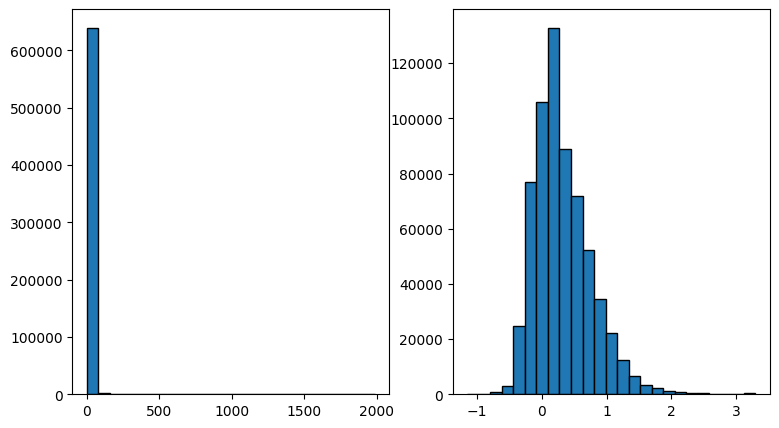

In [27]:
fig, axes = plt.subplots(1,2,figsize=(9,5))

axes[0].hist(df['RMED'],edgecolor="black",bins=25)
axes[1].hist(df['log_rdep'],edgecolor="black",bins=25)

In [28]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'log_rmed', 'log_rdep'],
      dtype='object')

In [29]:
cols = ['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC', 'FORCE_2020_LITHOFACIES_CONFIDENCE']

In [30]:
# Mapeamento de dicionário
lithology_map = {
    30000: 'Sandstone (Arenito)',
    65030: 'Sandstone/Shale (Arenito/Argilito)',
    65000: 'Shale (Argilito)',
    80000: 'Marl (Marga)',
    74000: 'Dolomite (Dolomita)',
    70000: 'Limestone (Calcário)',
    70032: 'Chalk (Giz)',
    88000: 'Halite (Halita)',
    86000: 'Anhydrite (Anidrita)',
    99000: 'Tuff (Tufo)',
    90000: 'Coal (Carvão)',
    93000: 'Basement (Substrato)'
}
df['LITHOLOGY'] = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: lithology_map.get(x, 'Unknown'))
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,log_rmed,log_rdep,LITHOLOGY
4238,15/9-13,1138.704,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,1.0,0.005742,0.038023,Sandstone (Arenito)
4239,15/9-13,1138.856,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,1.0,0.036703,0.050266,Shale (Argilito)
4240,15/9-13,1139.008,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,1.0,0.051984,0.059995,Shale (Argilito)
4241,15/9-13,1139.160,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,1.0,0.057463,0.068551,Shale (Argilito)
4242,15/9-13,1139.312,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,1.0,0.056145,0.073381,Shale (Argilito)


In [31]:
df.groupby(by='LITHOLOGY').min()[cols]

,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_CONFIDENCE
LITHOLOGY,,,,,,,,
Anhydrite (Anidrita),8.271731,2.361164,3.268016,2.618337,9.195698,-0.013786,39.041588,1.0
Basement (Substrato),12.338740,4.132351,7.812500,2.727421,22.531631,0.099438,43.564400,1.0
Chalk (Giz),7.756689,0.095034,0.309384,1.514750,4.562729,0.020792,54.266239,1.0
Coal (Carvão),6.942000,0.564622,0.438184,0.720971,1.089321,0.024577,58.170200,1.0
Dolomite (Dolomita),7.929700,0.476814,0.523961,1.830942,7.639176,0.005438,41.025799,1.0
Halite (Halita),8.671869,2.915897,2.618155,1.609768,15.799763,0.008412,51.280060,2.0
Limestone (Calcário),3.374000,0.282922,0.205671,1.486390,3.752096,0.000240,34.195072,1.0
Marl (Marga),7.325138,0.481790,0.461613,1.623699,7.777474,0.014352,53.238892,1.0
Sandstone (Arenito),5.805285,0.118303,0.087607,1.058234,0.898921,-0.035822,38.963421,1.0


In [34]:
df.groupby(by='LITHOLOGY')[cols].median()

,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_CONFIDENCE
LITHOLOGY,,,,,,,,
Anhydrite (Anidrita),12.656000,82.877804,70.595619,2.905920,22.056581,0.006540,51.929905,1.0
Basement (Substrato),12.453024,8.374042,23.467150,2.903033,33.778797,0.153812,47.503815,1.0
Chalk (Giz),12.672647,1.720447,1.847765,2.433817,17.029222,0.170449,78.223515,1.0
Coal (Carvão),9.201075,10.315152,7.551839,1.953638,69.896301,0.441235,102.473770,1.0
Dolomite (Dolomita),12.359397,1.992298,1.794285,2.514214,60.928459,0.289576,89.528839,1.0
Halite (Halita),11.086433,8.294719,10.487569,1.943669,55.048405,0.164820,59.366440,2.0
Limestone (Calcário),12.317929,2.863061,2.656102,2.499151,32.522507,0.178034,76.791740,1.0
Marl (Marga),12.636632,2.150680,1.988377,2.483857,56.757145,0.278956,90.396126,1.0
Sandstone (Arenito),8.690874,1.791688,1.553232,2.310474,50.003502,0.230344,88.271488,1.0


In [35]:
df.groupby(by='LITHOLOGY').max()[cols]

,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_CONFIDENCE
LITHOLOGY,,,,,,,,
Anhydrite (Anidrita),14.489843,1841.164062,1894.385132,3.001404,98.322258,0.149037,80.150520,2.0
Basement (Substrato),13.062956,20.014177,752.144959,3.054074,105.076424,0.243862,60.615841,3.0
Chalk (Giz),16.649570,20.911963,20.071527,2.796767,74.287605,0.501065,122.902916,3.0
Coal (Carvão),23.654171,1981.727417,1999.633667,2.870261,272.521729,0.789176,169.119690,3.0
Dolomite (Dolomita),20.778965,1531.574219,669.239319,2.971166,142.598099,0.803567,159.547287,3.0
Halite (Halita),12.662254,45.182999,41.020119,2.283624,78.285156,0.362868,73.235100,2.0
Limestone (Calcário),23.713579,1950.000000,1998.459961,3.111661,205.451355,0.817310,167.779526,3.0
Marl (Marga),21.846077,701.105530,1149.453247,3.141885,196.702942,0.584632,149.310516,3.0
Sandstone (Arenito),23.703100,1988.616333,1999.794678,3.095282,645.004517,0.913161,176.614929,3.0


In [36]:
print(f'Número de amostras antes da filtragem: {len(df)}\nNúmero de amostras depois: {len(df[(df.RHOB>=1.5)])}, Dados removidos: {len(df)-len(df[(df.RHOB>=1.5)])}')
df = df[(df.RHOB>=1.5)]
print(f'Número de amostras antes da filtragem: {len(df)}\nNúmero de amostras depois: {len(df[(df.NPHI>=0)])}, Dados removidos: {len(df)-len(df[(df.NPHI>=0)])}')
df = df[(df.NPHI>=0)]
print(f'Número de amostras antes da filtragem: {len(df)}\nNúmero de amostras depois: {len(df[(df.DTC>=30)])}, Dados removidos: {len(df)-len(df[(df.DTC>=30)])}')
df = df[(df.DTC>=30)]

Número de amostras antes da filtragem: 642770
Número de amostras depois: 641999, Dados removidos: 771
Número de amostras antes da filtragem: 641999
Número de amostras depois: 641867, Dados removidos: 132
Número de amostras antes da filtragem: 641867
Número de amostras depois: 641808, Dados removidos: 59


In [37]:
len(df)

641808

In [41]:
#Criando um rótulo numérico para GROUP e FORMATION
lb_group = LabelEncoder()
lb_group.fit(df['GROUP'])
df['GROUP_NUM'] = lb_group.transform(df['GROUP'])

lb_FORM = LabelEncoder()
lb_FORM.fit(df['FORMATION'])
df['FORM_NUM'] = lb_FORM.transform(df['FORMATION'])

In [43]:
df[["GROUP","GROUP_NUM"]].head()

,GROUP,GROUP_NUM
4238,NORDLAND GP.,6
4239,NORDLAND GP.,6
4240,NORDLAND GP.,6
4241,NORDLAND GP.,6
4242,NORDLAND GP.,6


In [45]:
#Vamos separar 5 poços para se tornarem o blind do experimento
well_names = df.WELL.isin(np.random.choice(df.WELL.unique(),size=5))

blind = df[well_names]
dataset = df[~well_names]

print(f'Número de elementos no treino: {len(dataset)}\nNúmero de elementos no blind: {len(blind)}')
print(f'propoção blind/test: {len(blind)/len(dataset)*100:.2f}%')

Número de elementos no treino: 603131
Número de elementos no blind: 38677
propoção blind/test: 6.41%


### Análise de atributos (variáveis)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603131 entries, 4238 to 1170446
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               603131 non-null  object 
 1   DEPTH_MD                           603131 non-null  float64
 2   X_LOC                              603131 non-null  float64
 3   Y_LOC                              603131 non-null  float64
 4   Z_LOC                              603131 non-null  float64
 5   GROUP                              603131 non-null  object 
 6   FORMATION                          603131 non-null  object 
 7   CALI                               603131 non-null  float64
 8   RMED                               603131 non-null  float64
 9   RDEP                               603131 non-null  float64
 10  RHOB                               603131 non-null  float64
 11  GR                                 60313

In [ ]:
dataset.columns

In [47]:
cols = ['X_LOC', 'Y_LOC', 'Z_LOC',
       'CALI', 'RHOB', 'GR', 'NPHI', 'DTC','FORCE_2020_LITHOFACIES_CONFIDENCE',
       'GROUP_NUM', 'FORM_NUM',
       'log_rmed','log_rdep']

In [48]:
dtc = DecisionTreeClassifier(criterion='entropy')

dtc.fit(dataset[cols],dataset['FORCE_2020_LITHOFACIES_LITHOLOGY'])


DecisionTreeClassifier(criterion='entropy')

In [49]:
for i,j in zip(dtc.feature_names_in_,dtc.feature_importances_):
    print("{:<40}{:.2f}%".format(i, j*100))

X_LOC                                   8.67%
Y_LOC                                   9.23%
Z_LOC                                   12.26%
CALI                                    4.91%
RHOB                                    7.34%
GR                                      15.94%
NPHI                                    15.75%
DTC                                     4.27%
FORCE_2020_LITHOFACIES_CONFIDENCE       3.07%
GROUP_NUM                               9.12%
FORM_NUM                                2.67%
log_rmed                                3.86%
log_rdep                                2.91%


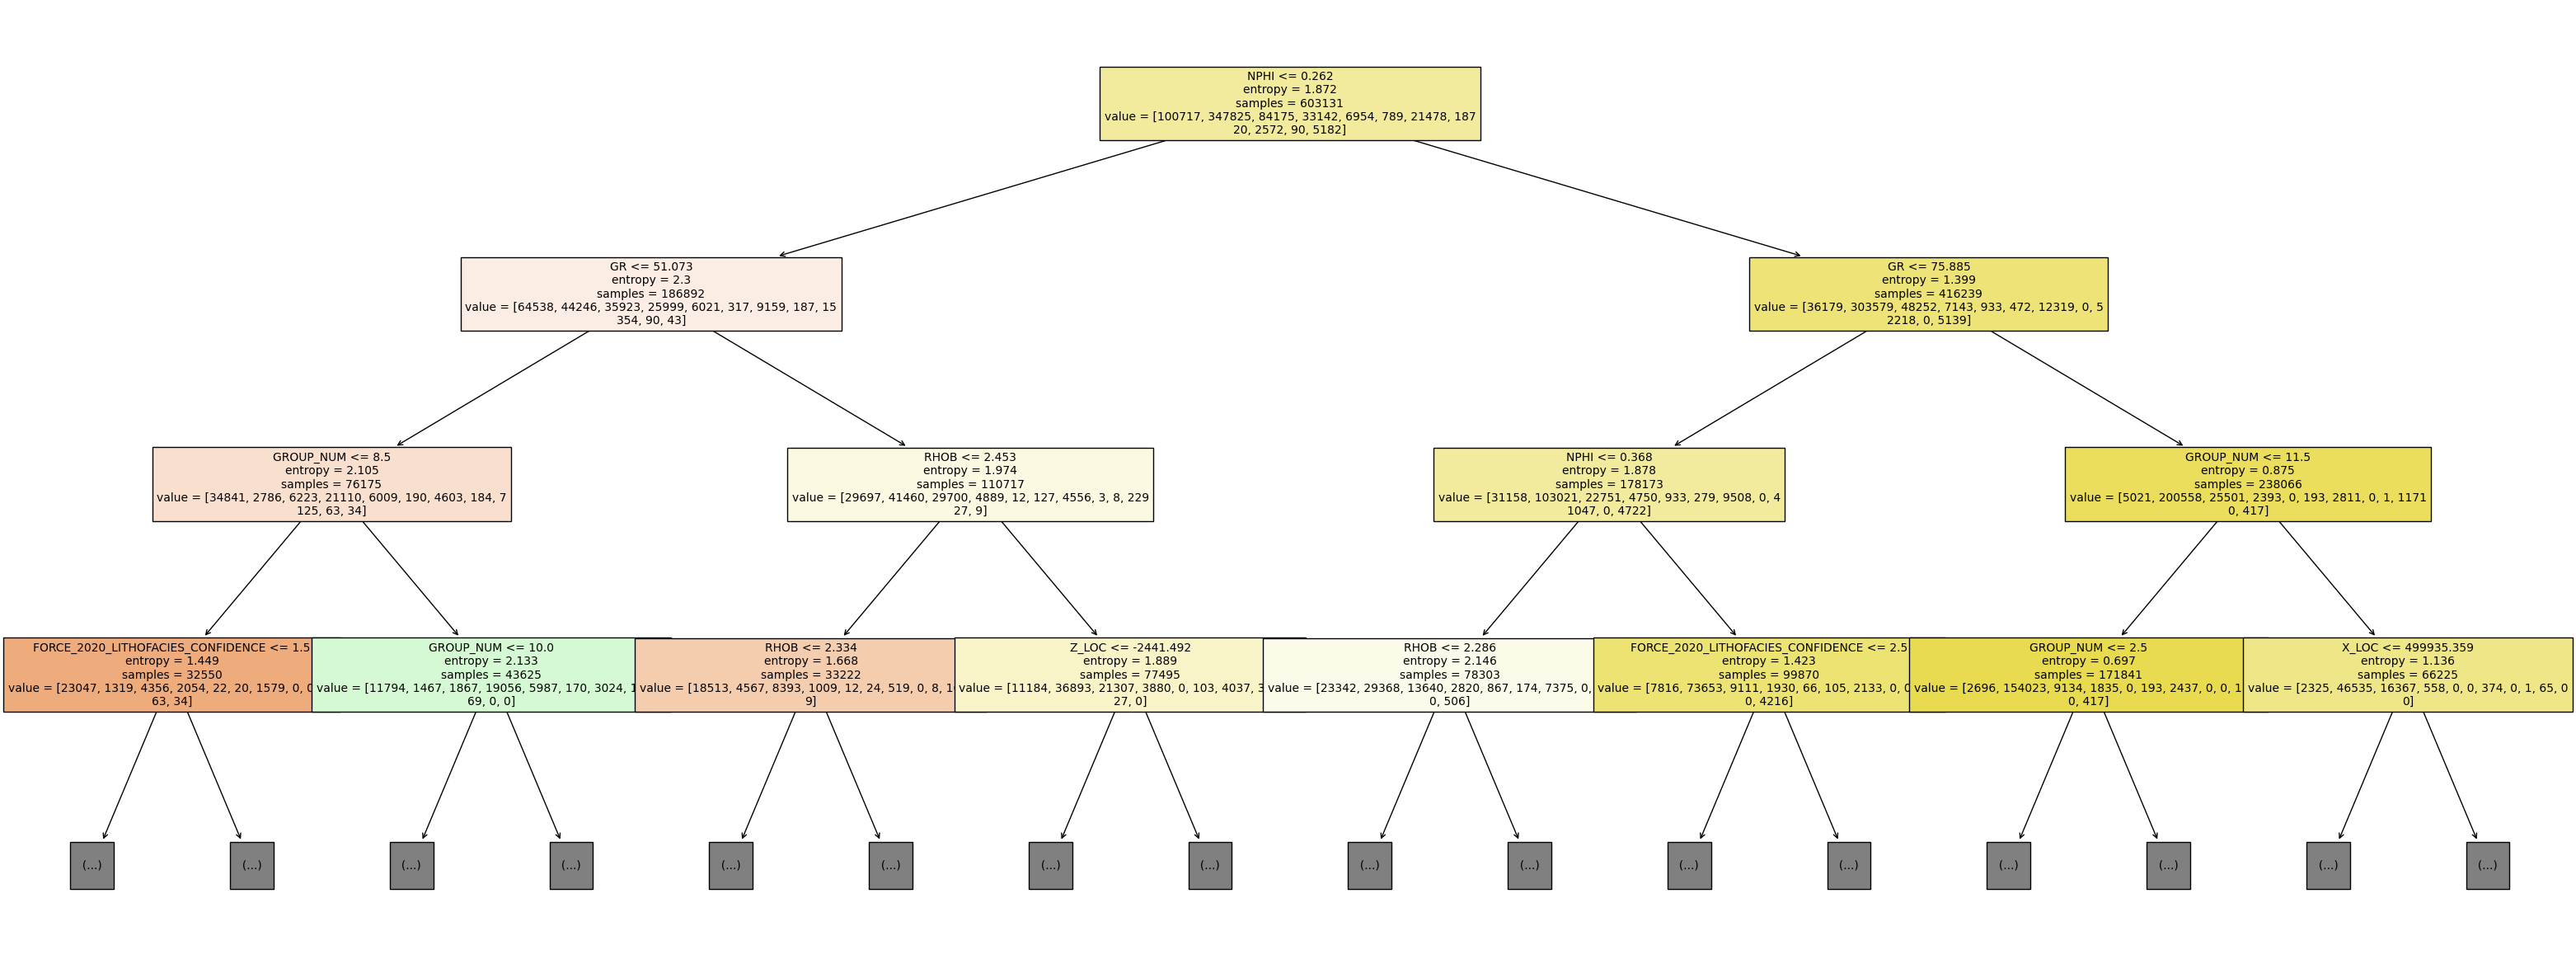

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,15))
plot_tree(dtc,feature_names=cols, max_depth=3,filled=True,proportion=False,fontsize=10)
plt.show()

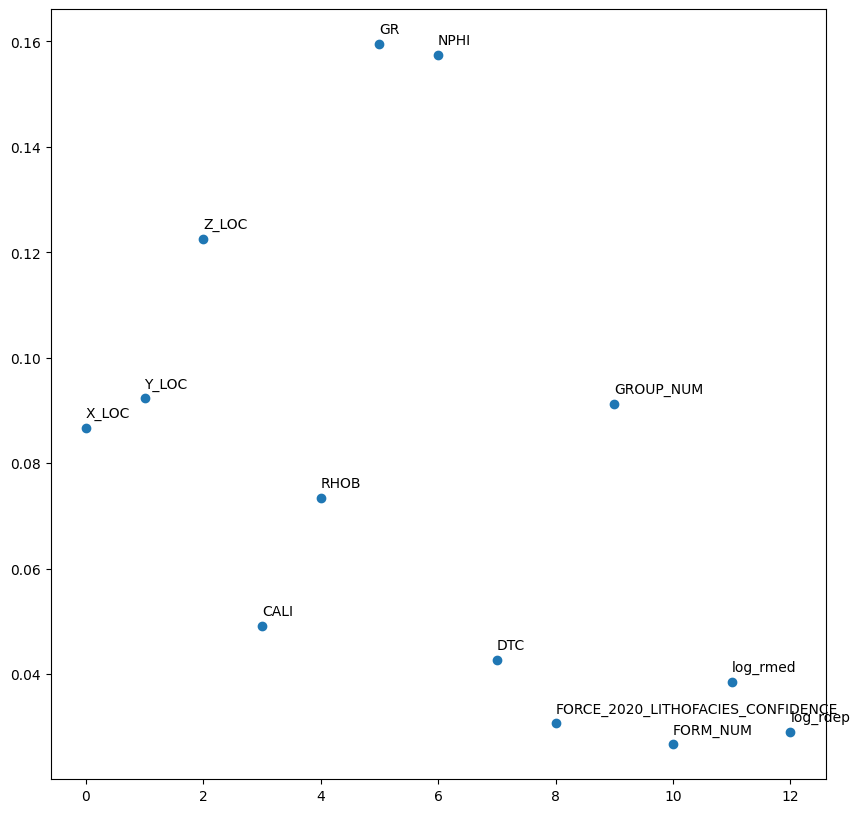

In [51]:
#Visualizando como um histograma
plt.figure(figsize=(10,10))

plt.scatter(np.arange(len(dtc.feature_importances_)),dtc.feature_importances_)

for i,j,k in zip(np.arange(len(dtc.feature_importances_)),dtc.feature_importances_,dtc.feature_names_in_):
    plt.text(i,j+0.002,k)

In [54]:
pca = PCA()
scaler = StandardScaler()
scaler.fit(dataset[cols])
pca.fit(scaler.transform(dataset[cols]))

PCA()

Text(0, 0.5, 'Variância acumulada normalizada')

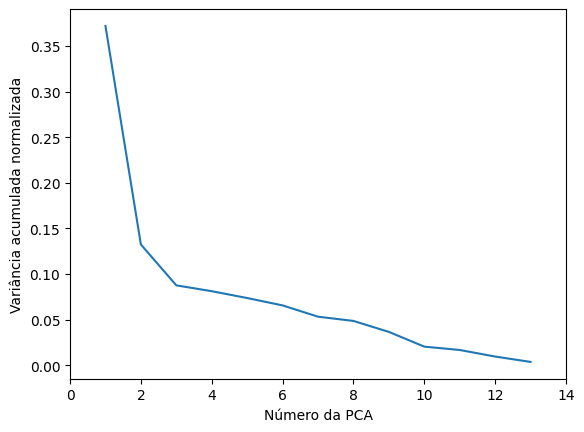

In [56]:
plt.plot(np.arange(1,len(cols)+1),(pca.explained_variance_ratio_))
plt.xlim(0,len(cols)+1)
plt.xlabel('Número da PCA')
plt.ylabel('Variância acumulada normalizada')

Text(0, 0.5, 'Variância acumulada normalizada')

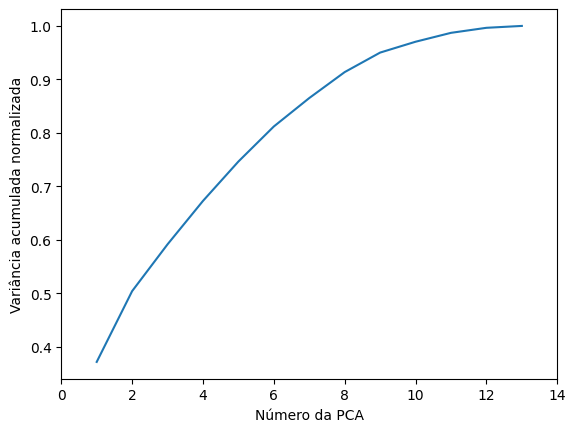

In [57]:
plt.plot(np.arange(1,len(cols)+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,len(cols)+1)
plt.xlabel('Número da PCA')
plt.ylabel('Variância acumulada normalizada')

In [58]:
dataset[cols].corr()

,X_LOC,Y_LOC,Z_LOC,CALI,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_NUM,FORM_NUM,log_rmed,log_rdep
X_LOC,1.000000,0.481378,0.042392,-0.116871,0.193667,0.202500,-0.151811,-0.235149,-0.034262,0.149956,-0.235845,0.247235,0.258021
Y_LOC,0.481378,1.000000,-0.336944,-0.160464,0.340383,0.237767,-0.143809,-0.226454,-0.124426,0.025562,-0.285418,0.288287,0.298449
Z_LOC,0.042392,-0.336944,1.000000,0.432766,-0.710856,-0.087295,0.536181,0.682156,0.046690,0.136358,0.257139,-0.544705,-0.505979
CALI,-0.116871,-0.160464,0.432766,1.000000,-0.474131,-0.158332,0.426452,0.489599,0.047787,0.044166,0.216118,-0.387133,-0.333242
RHOB,0.193667,0.340383,-0.710856,-0.474131,1.000000,0.148329,-0.624616,-0.806441,-0.012673,0.049002,-0.312997,0.581333,0.539742
GR,0.202500,0.237767,-0.087295,-0.158332,0.148329,1.000000,0.225239,0.055789,-0.122630,0.137109,-0.254070,0.094176,0.105291
NPHI,-0.151811,-0.143809,0.536181,0.426452,-0.624616,0.225239,1.000000,0.792697,-0.035205,-0.001690,0.101126,-0.535355,-0.521902
DTC,-0.235149,-0.226454,0.682156,0.489599,-0.806441,0.055789,0.792697,1.000000,-0.037445,-0.051250,0.245124,-0.626877,-0.589305
FORCE_2020_LITHOFACIES_CONFIDENCE,-0.034262,-0.124426,0.046690,0.047787,-0.012673,-0.122630,-0.035205,-0.037445,1.000000,0.024869,-0.079593,-0.030503,-0.037234
GROUP_NUM,0.149956,0.025562,0.136358,0.044166,0.049002,0.137109,-0.001690,-0.051250,0.024869,1.000000,-0.012793,0.010763,0.026374


In [59]:
cols_name = dataset[cols].reset_index().join(pd.DataFrame(pca.transform(dataset[cols]))).columns

corr = dataset[cols].reset_index().join(pd.DataFrame(pca.transform(dataset[cols]))).corr()

c:\Users\Acer3\anaconda3\envs\proj_petro\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\Acer3\anaconda3\envs\proj_petro\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


<Axes: >

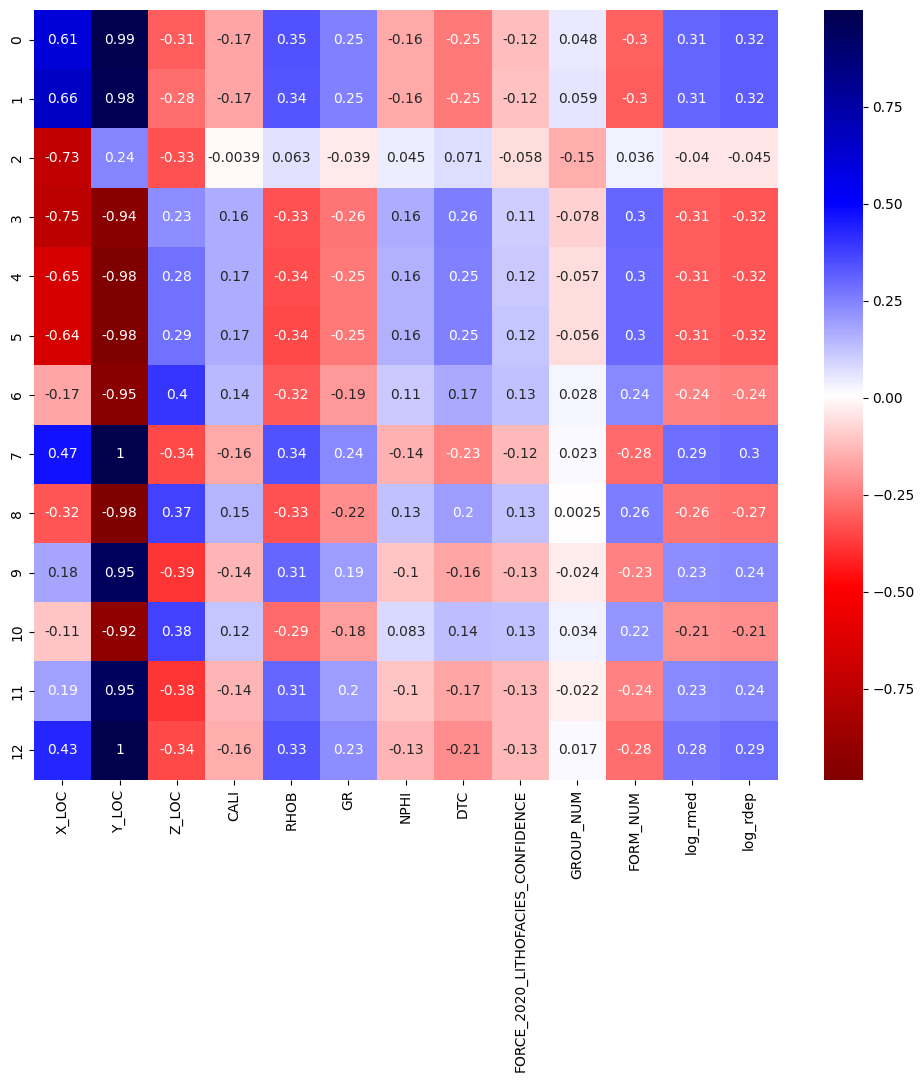

In [60]:
plt.figure(figsize=(12,10))
heatmap(corr.loc[0:12][cols_name[1:-len(cols)]],annot=True,cmap='seismic_r')

In [61]:
dataset.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'log_rmed', 'log_rdep', 'LITHOLOGY', 'GROUP_NUM', 'FORM_NUM'],
      dtype='object')

In [62]:
### Seleção dos atributos e crossvalidação

cols_train = ['X_LOC', 'Y_LOC', 'Z_LOC','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'log_rmed', 'log_rdep', 'GROUP_NUM']

In [65]:
X = dataset[cols_train]
y = dataset['FORCE_2020_LITHOFACIES_LITHOLOGY']

scaler_nn = StandardScaler()

scaler_nn.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Classificação de litologias

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(50,25))

mlp.fit(scaler_nn.transform(X_train),y_train)

c:\Users\Acer3\anaconda3\envs\proj_petro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 25))

In [70]:
plt.plot(np.arange(1,len(cols)+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,len(cols)+1)
plt.xlabel('Número da PCA')
plt.ylabel('Variância acumulada normalizada')

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'log_rmed', 'log_rdep', 'LITHOLOGY', 'GROUP_NUM', 'FORM_NUM'],
      dtype='object')

In [74]:
k = dataset['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()
z = dataset['LITHOLOGY'].unique()
lito = {}
for i,j in zip(k,z):
    lito[i] = j

In [75]:
lito

{30000: 'Sandstone (Arenito)',
 65000: 'Shale (Argilito)',
 65030: 'Sandstone/Shale (Arenito/Argilito)',
 70000: 'Limestone (Calcário)',
 99000: 'Tuff (Tufo)',
 80000: 'Marl (Marga)',
 70032: 'Chalk (Giz)',
 74000: 'Dolomite (Dolomita)',
 90000: 'Coal (Carvão)',
 88000: 'Halite (Halita)',
 86000: 'Anhydrite (Anidrita)',
 93000: 'Basement (Substrato)'}

In [79]:
lito

{30000: 'Sandstone (Arenito)',
 65000: 'Shale (Argilito)',
 65030: 'Sandstone/Shale (Arenito/Argilito)',
 70000: 'Limestone (Calcário)',
 99000: 'Tuff (Tufo)',
 80000: 'Marl (Marga)',
 70032: 'Chalk (Giz)',
 74000: 'Dolomite (Dolomita)',
 90000: 'Coal (Carvão)',
 88000: 'Halite (Halita)',
 86000: 'Anhydrite (Anidrita)',
 93000: 'Basement (Substrato)'}

In [78]:
print(classification_report(y_train,mlp.predict(scaler_nn.transform(X_train))))

              precision    recall  f1-score   support

       30000       0.83      0.86      0.84     67553
       65000       0.90      0.95      0.93    233013
       65030       0.71      0.62      0.66     56253
       70000       0.84      0.67      0.74     22189
       70032       0.88      0.90      0.89      4716
       74000       0.40      0.10      0.16       509
       80000       0.80      0.72      0.76     14414
       86000       0.88      0.96      0.92       126
       88000       0.64      0.54      0.58        13
       90000       0.77      0.55      0.65      1726
       93000       0.94      0.94      0.94        52
       99000       0.85      0.95      0.90      3533

    accuracy                           0.86    404097
   macro avg       0.79      0.73      0.75    404097
weighted avg       0.86      0.86      0.86    404097



In [80]:
print(classification_report(y_test,mlp.predict(scaler_nn.transform(X_test))))

              precision    recall  f1-score   support

       30000       0.83      0.86      0.84     33164
       65000       0.90      0.95      0.92    114812
       65030       0.71      0.61      0.65     27922
       70000       0.83      0.65      0.73     10953
       70032       0.88      0.89      0.88      2238
       74000       0.49      0.09      0.15       280
       80000       0.79      0.73      0.76      7064
       86000       0.76      0.97      0.85        61
       88000       1.00      0.29      0.44         7
       90000       0.77      0.52      0.62       846
       93000       0.97      0.89      0.93        38
       99000       0.84      0.95      0.89      1649

    accuracy                           0.86    199034
   macro avg       0.81      0.70      0.72    199034
weighted avg       0.85      0.86      0.85    199034



In [84]:
print(classification_report(blind['FORCE_2020_LITHOFACIES_LITHOLOGY'],mlp.predict(scaler_nn.transform(blind[cols_train]))))

              precision    recall  f1-score   support

       30000       0.77      0.82      0.79      4864
       65000       0.96      0.86      0.91     26845
       65030       0.27      0.54      0.36      1877
       70000       0.77      0.80      0.78      3148
       70032       0.00      0.00      0.00         0
       74000       0.00      0.00      0.00        34
       80000       0.65      0.65      0.65      1154
       86000       0.00      0.00      0.00         0
       90000       0.74      0.44      0.56       135
       93000       0.00      0.00      0.00         0
       99000       0.70      0.97      0.81       620

    accuracy                           0.83     38677
   macro avg       0.44      0.46      0.44     38677
weighted avg       0.87      0.83      0.84     38677



c:\Users\Acer3\anaconda3\envs\proj_petro\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\envs\proj_petro\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\envs\proj_petro\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\

In [ ]:
mlp_models = []

for i in range(-4,2):
    mlp_models.append(MLPClassifier(alpha=10**i))

    mlp_models[-1].fit(scaler_nn.transform(X_train),y_train)